In [1]:
 pip install tabula-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tabula

In [3]:
def create_median_df(table_list, col_names):
    '''extract the median of each sample to a new column
    Args:
    - table_list: seq. of panda df
    - col_names: seq of str names
    
    return dataframe with median
    '''
    
    df = pd.DataFrame()
    for table, col in zip(table_list, col_names):
        df['median_'+ col] = table.median(1)
    return df

In [33]:
def plot_corr(data):
    '''
    Plot correlation 
    
    Args:
    - data: pd dataframe
    
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(5, 5))
        ax = sns.heatmap(corr, square=True, cmap='RdBu_r', center=0)


In [4]:
magnetic_pdf = os.path.join(os.path.dirname(os.getcwd()), 'Raw_data/MagneticMethods_Report.pdf')

In [5]:
tables = tabula.read_pdf(magnetic_pdf, pages=[10,11,12,13], lattice=True, pandas_options={'header':1})

In [6]:
#Cleaning tables
for df in tables:
    df.drop(0, inplace=True)
    df.set_index(df.iloc[:,0], inplace=True, drop=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
table_names = ['pipe_CF_g', 'pipe_CF_ug', 'pipe_perm_g', 'pipe_perm_ug', 'pipe_MBN_g', 'pipe_MBN_ug',\
              'CF', 'perm', 'MBN', 'CF', 'perm', 'MBN']

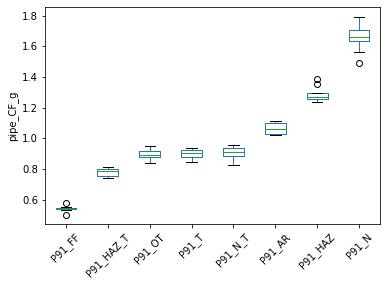

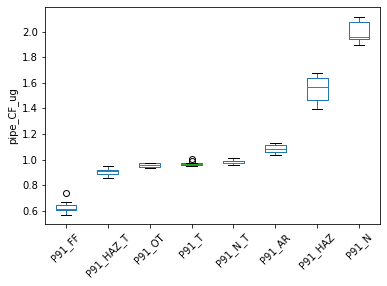

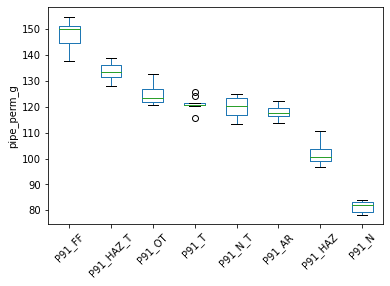

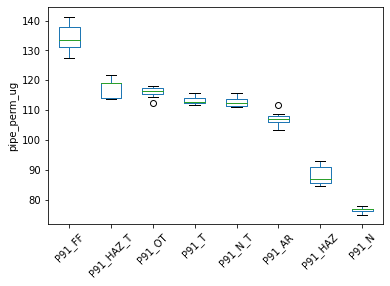

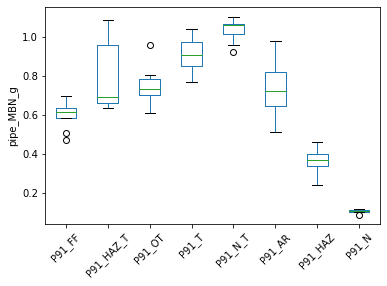

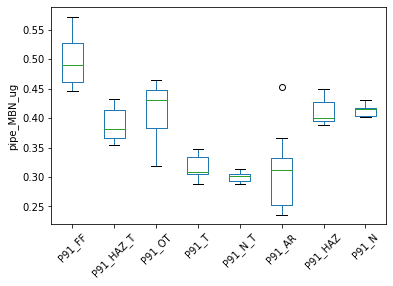

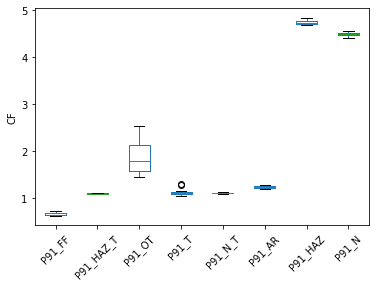

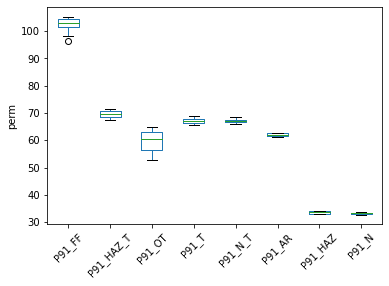

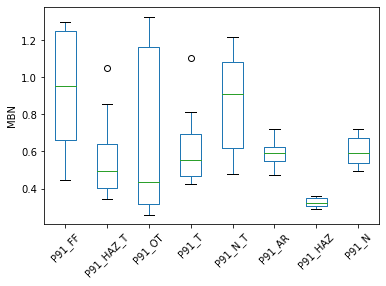

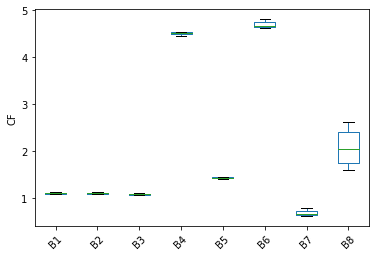

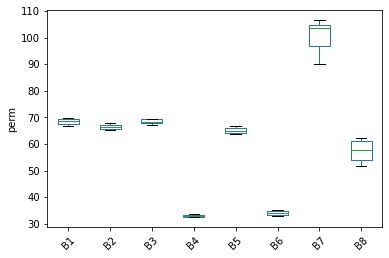

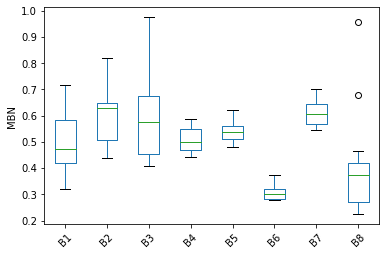

In [8]:
for table, name in zip(tables, table_names):
    data = table.transpose().astype('float')
    data.plot.box(rot=45, ylabel=name)

In [9]:
hard_ref = tabula.read_pdf(magnetic_pdf, pages=[5], lattice=True) #get the reference hardness table
pipes = tables[0:6] # 1)ground (g) followed by 2)unground (ug) for coercive field (CF), permability (perm), MBN
tubes = tables[6:9] # CF, perm, MBN for first 3 = ID
B_tubes = tables[9:] # CF, perm, MBN for last 3 = Unknown

In [10]:
column_tubes = table_names[6:9]
median_tubes = create_median_df(tubes, column_tubes)
column_b_tubes = table_names[9:]
median_b_tubes = create_median_df(B_tubes, column_b_tubes)
median_all_tubes = pd.concat([median_b_tubes, median_tubes], ignore_index=False)

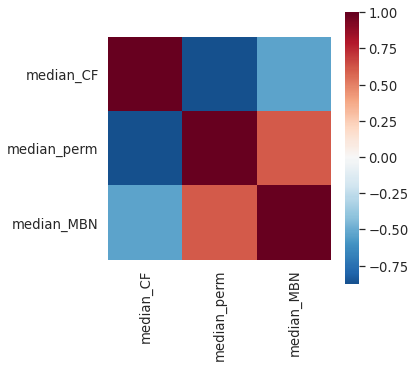

In [34]:
plot_corr(median_all_tubes)

In [11]:
median_all_tubes.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'Cleaned_data/TUBE_magnetic_param_median.csv'))

In [12]:
column_pipes = table_names[0:6]
median_pipes = create_median_df(pipes, column_pipes)

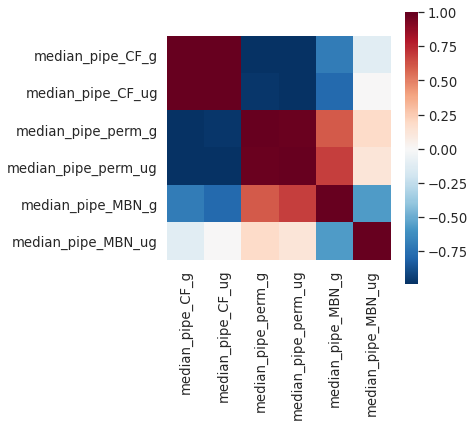

In [35]:
plot_corr(median_pipes)

In [13]:
median_pipes.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'Cleaned_data/PIPE_magnetic_param_median.csv'))